[Paper](https://pdfs.semanticscholar.org/1a19/f55bc7f5d3d90bd5cb239c0202b3428b6aa2.pdf)

[Code](https://github.com/titu1994/DenseNet/blob/master/densenet_fast.py)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data
from torch.utils.data import Subset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau
from sklearn import metrics
from torch.nn import functional as F
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet201

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules


import matplotlib.pyplot as plt
import time
import os
import copy
import tensorflow as tf
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import AveragePooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers import Input,
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2
import keras.backend as K

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1./255)
       # rotation_range=40,
       # height_shift_range=0.2,
       # shear_range=0.2,
       # zoom_range=0.2,
       # horizontal_flip=True,
       # fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=4,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 480 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [ ]:
print("label map for train: ",train_generator.class_indices)
print("")
print("----")
print("")
print("label map for val data: ",valid_generator.class_indices)

label map for train:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}

----

label map for val data:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}


In [ ]:
print("Train classes: ",train_generator.classes)
print("")
print("Valid classes: ",valid_generator.classes)

Train classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

Valid cla

In [ ]:

def H(  inputs, num_filters , dropout_rate):
    x = tf.keras.layers.BatchNormalization( epsilon=eps )( inputs )
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D((1, 1))(x)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3,3), use_bias=False , kernel_initializer='he_normal' )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate )(x)
    return x


In [ ]:

def transition(inputs, num_filters , compression_factor , dropout_rate ):
    # compression_factor is the 'θ'
    x = tf.keras.layers.BatchNormalization( epsilon=eps )(inputs)
    x = tf.keras.layers.Activation('relu')(x)
    num_feature_maps = inputs.shape[1] # The value of 'm'

    x = tf.keras.layers.Conv2D( np.floor( compression_factor * num_feature_maps ).astype( np.int ) ,
                               kernel_size=(1, 1), use_bias=False, padding='same' , kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate)(x)

    x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(x)
    return x

In [ ]:

def dense_block( inputs, num_layers, num_filters, growth_rate , dropout_rate ):
    for i in range(num_layers):
      conv_outputs = H(inputs, num_filters , dropout_rate)

      inputs = tf.keras.layers.Concatenate()([conv_outputs, inputs])
      num_filters += growth_rate # To increase the number of filters for each layer.
    return inputs, num_filters


In [ ]:
# kernel_size1=(7,7)
# kernel_size2=(3,3)
input_shape = ( 224 , 224 , 3 )
num_blocks = 4
num_layers_per_block = 4
growth_rate = 16
dropout_rate = 0.1
compress_factor = 0.5
eps = 1.1e-5

num_filters = 16

inputs = tf.keras.layers.Input( shape=input_shape )
x = tf.keras.layers.Conv2D( num_filters , kernel_size=( 3 , 3 ) , use_bias=False, kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )( inputs )

for i in range( num_blocks ):
    x, num_filters = dense_block( x, num_layers_per_block , num_filters, growth_rate , dropout_rate )
    x = transition(x, num_filters , compress_factor , dropout_rate )

x = tf.keras.layers.GlobalAveragePooling2D()( x )
x = tf.keras.layers.Dense( 8 )( x ) # Num Classes for CIFAR-10
outputs = tf.keras.layers.Activation( 'softmax' )( x )
base_model = tf.keras.models.Model( inputs , outputs )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
for layer in base_model.layers:
    layer.trainable = False  #True

In [ ]:
base_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 222, 222, 16  432         ['input_24[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_31 (BatchN  (None, 222, 222, 16  64         ['conv2d_36[0][0]']              
 ormalization)                  )                                                           

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

epochs = 100
batch_size = 32
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     decay_steps =240, decay_rate = 0.7,
#     ial_learning_rate=0.0002)


#opt = keras.optimizers.SGD(learning_rate = 0.001, momentum = 1)
opt = keras.optimizers.Adam(learning_rate = 0.001)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.9, epsilon=1e-07)

base_model.compile(optimizer=opt ,  #rmsprop #sgd
              loss='categorical_crossentropy',  metrics=['accuracy'])

history = base_model.fit(train_generator, shuffle = True,
          epochs=epochs, verbose=1,  validation_data = valid_generator)  #steps_per_epoch= 200, validation_steps= 200

Epoch 1/100
120/120 [==============================] - 32s 242ms/step - loss: 2.2289 - accuracy: 0.1250 - val_loss: 2.2759 - val_accuracy: 0.1250
Epoch 2/100
120/120 [==============================] - 29s 238ms/step - loss: 2.2284 - accuracy: 0.1250 - val_loss: 2.2759 - val_accuracy: 0.1250
Epoch 3/100
120/120 [==============================] - 29s 239ms/step - loss: 2.2298 - accuracy: 0.1250 - val_loss: 2.2759 - val_accuracy: 0.1250
Epoch 4/100
120/120 [==============================] - 29s 239ms/step - loss: 2.2287 - accuracy: 0.1250 - val_loss: 2.2759 - val_accuracy: 0.1250
Epoch 5/100
120/120 [==============================] - 29s 240ms/step - loss: 2.2278 - accuracy: 0.1250 - val_loss: 2.2759 - val_accuracy: 0.1250
Epoch 6/100
120/120 [==============================] - 29s 238ms/step - loss: 2.2271 - accuracy: 0.1250 - val_loss: 2.2759 - val_accuracy: 0.1250
Epoch 7/100
120/120 [==============================] - 29s 239ms/step - loss: 2.2282 - accuracy: 0.1250 - val_loss: 2.2759 -

In [ ]:
import matplotlib.pyplot as plt
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss

In [ ]:
base_model.save("/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/paper5.h5" )

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/paper5.h5')

#testing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",  #None
    shuffle=False,
    #seed=42
)
nBatches = 1

Found 1876 images belonging to 8 classes.


In [ ]:
test_generator.reset()

In [ ]:
y_true = test_generator.classes

In [ ]:
print("Test images class lables: ",y_true)

Test images class lables:  [0 0 0 ... 7 7 7]


In [ ]:
pred=model.predict_generator(generator=test_generator, steps=test_generator.samples//nBatches, max_queue_size=10,
                                workers=1, use_multiprocessing=False, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


1876/1876 [==============================] - 382s 202ms/step


In [ ]:
#y_pred = np.argmax(pred,axis=1)
print("Test images predicted labels: ", pred)

Test images predicted labels:  [[0.08372338 0.3495071  0.12962827 ... 0.05397842 0.12263276 0.11002974]
 [0.0877896  0.3265982  0.12995961 ... 0.05812953 0.12224349 0.11465381]
 [0.09030262 0.31164864 0.12942146 ... 0.06034229 0.11976856 0.11917002]
 ...
 [0.08695964 0.31856677 0.12946978 ... 0.05745277 0.11660762 0.12145809]
 [0.08428337 0.34190124 0.12893796 ... 0.0543667  0.12017138 0.11451655]
 [0.08842998 0.3041559  0.13093658 ... 0.05916451 0.1162352  0.1250007 ]]


In [ ]:
pred.shape

(1876, 8)

In [ ]:
y_prd = np.argmax(pred,axis=1)
print("y_prd shape: ",y_prd.shape)
print("")
print("y_true.shape", y_true.shape)

y_prd shape:  (1876,)

y_true.shape (1876,)


In [ ]:
score = model.evaluate_generator(generator=test_generator,
                                     steps=test_generator.samples//nBatches,
                                     max_queue_size=10,
                                     workers=1,
                                     use_multiprocessing=False,
                                     verbose=1)
print("Test loss: %.3f - Test acc: %.3f" % (score[0], score[1]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


1876/1876 [==============================] - 111s 59ms/step - loss: 2.3849 - accuracy: 0.1269
Test loss: 2.385 - Test acc: 0.127


In [ ]:
print(score)

[2.3849215507507324, 0.1268656700849533]


#EVALUATION

<font size = 5><font color="yellow">Confusion matrix & classification report

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_prd)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[  0  98   0   0   0   0   0   0]
 [  0 238   0   0   0   0   0   0]
 [  0  94   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0]
 [  0 857   0   0   0   0   0   0]
 [  0 140   0   0   0   0   0   0]
 [  0 188   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0]]


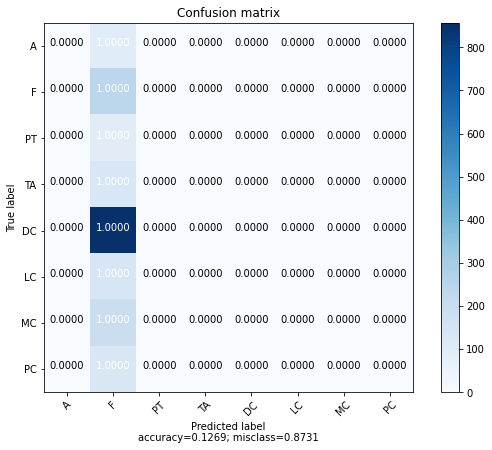

In [ ]:
import numpy as np
import itertools

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):



    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm, target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_prd)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_prd, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_prd, target_names=['Class 0- A:', 'Class 1- F:', 'Class 2- PT:', 'Class 3- TA:','Class 4- DC:','Class 5- LC:','Class 6- MC:', 'Class 7- PC:'], digits = 4))



Accuracy: 0.13

Micro Precision: 0.13
Micro Recall: 0.13
Micro F1-score: 0.13

Macro Precision: 0.02
Macro Recall: 0.12
Macro F1-score: 0.03

Weighted Precision: 0.02
Weighted Recall: 0.13
Weighted F1-score: 0.03

Classification Report

              precision    recall  f1-score   support

 Class 0- A:     0.0000    0.0000    0.0000        98
 Class 1- F:     0.1269    1.0000    0.2252       238
Class 2- PT:     0.0000    0.0000    0.0000        94
Class 3- TA:     0.0000    0.0000    0.0000       132
Class 4- DC:     0.0000    0.0000    0.0000       857
Class 5- LC:     0.0000    0.0000    0.0000       140
Class 6- MC:     0.0000    0.0000    0.0000       188
Class 7- PC:     0.0000    0.0000    0.0000       129

    accuracy                         0.1269      1876
   macro avg     0.0159    0.1250    0.0281      1876
weighted avg     0.0161    0.1269    0.0286      1876



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetr

<font size = 5><font color="yellow">ROC AUC score/curve

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
scr1 = roc_auc_score(y_true, pred, multi_class='ovo', average='macro')
scr3 = roc_auc_score(y_true, pred, multi_class='ovr', average='macro')
scr2 = roc_auc_score(y_true, pred, multi_class='ovo', average='weighted')
scr4 = roc_auc_score(y_true, pred, multi_class='ovr', average='weighted')

print("macro - ovo ROC AUC Score: ", scr1)
print("")

print("weighted - ovo ROC AUC Score: ", scr2)
print("")

print("macro - ovr ROC AUC Score: ", scr3)
print("")

print("weighted - ovr ROC AUC Score: ", scr4)
print("")


macro - ovo ROC AUC Score:  0.5320811624478113

weighted - ovo ROC AUC Score:  0.533812297505911

macro - ovr ROC AUC Score:  0.5158829781465352

weighted - ovr ROC AUC Score:  0.5576634447365613



class 0 - A  : --AUC---> 0.5
class 1 - F  : --AUC---> 0.5
class 2 - PT  : --AUC---> 0.5
class 3 - TA  : --AUC---> 0.5
class 4 - DC  : --AUC---> 0.5
class 5 - LC  : --AUC---> 0.5
class 6 - MC  : --AUC---> 0.5
class 7 - PC  : --AUC---> 0.5


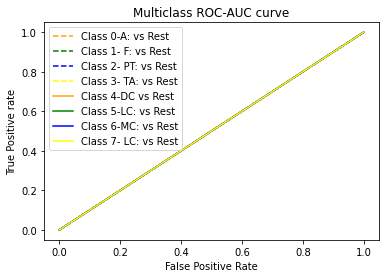

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']
n_class = 8

for i in range(len(target_names)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_prd[:], pos_label=i)
    auroc = round(metrics.auc(fpr[i], tpr[i]),2)
    print('class',i,'-', target_names[i],' :','--AUC--->',auroc)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0-A: vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1- F: vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2- PT: vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3- TA: vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='orange', label='Class 4-DC vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class 5-LC: vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-',color='blue', label='Class 6-MC: vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-',color='yellow', label='Class 7- LC: vs Rest')


plt.title('Multiclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multilass ROC',dpi=300, bbox_inches='tight',   pad_inches = 0);


plt.show()